
#### Importing Packages

In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show


In [2]:
fraudDataSetOrignal = pd.read_excel('Fraud+Analytics+Dataset.xlsx') #Importing the Dataset

In [3]:
fraudDataSet = fraudDataSetOrignal.copy()

In [4]:
fraudDataSet.head(5) #Checking the column Names and value

,user_id,signup_date,purchase date,purchase_time,purchase_value,source,browser,sex,age,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18,02:47:11,34,SEO,Chrome,M,39,0
1,333320,2015-06-07 20:39:50,2015-06-08,01:38:54,16,Ads,Chrome,F,53,0
2,1359,2015-01-01 18:52:44,2015-01-01,18:52:45,15,SEO,Opera,M,53,1
3,150084,2015-04-28 21:13:25,2015-05-04,13:54:50,44,SEO,Safari,M,41,0
4,221365,2015-07-21 07:09:52,2015-09-09,18:40:53,39,Ads,Safari,M,45,0


In [5]:
fraudDataSet.info() #Checking the types of values / Number of records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_date     151112 non-null  datetime64[ns]
 2   purchase date   151112 non-null  datetime64[ns]
 3   purchase_time   151112 non-null  object        
 4   purchase_value  151112 non-null  int64         
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   is_fraud        151112 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 11.5+ MB


## 1.1

In [6]:
fraudDataSet['age'].min() #Finding Minimum Age or creating Bucket for Analysis

18

In [7]:
fraudDataSet['age'].max() #Finding Maximum Age for creating Bucket for Analysis

76

In [8]:
#Creating Age Bins to analyse AGE column Independently.

Bins = [18, 29, 39, 49, 59, 69, 120]
Labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
fraudDataSet['AgeRange'] = pd.cut(fraudDataSet.age, Bins, labels = Labels,include_lowest = True)


In [9]:
print('\033[01m'"Total Number Of People doing Transaction Between Age :"'\033[0m')
print(fraudDataSet['AgeRange'].value_counts())
print("\n")
print('\033[01m'"Percentage of Transactions with respect to Age Range is"'\033[0m')
print(round(((fraudDataSet['AgeRange'].value_counts(normalize=True))*100),3))

Total Number Of People doing Transaction Between Age :
30-39    60815
18-29    55598
40-49    28766
50-59     5524
60-69      400
70+          9
Name: AgeRange, dtype: int64


Percentage of Transactions with respect to Age Range is
30-39    40.245
18-29    36.793
40-49    19.036
50-59     3.656
60-69     0.265
70+       0.006
Name: AgeRange, dtype: float64


Text(0, 0.5, 'Age Ranges')

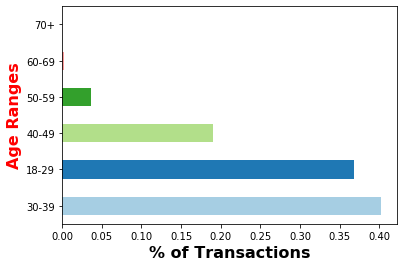

In [10]:
fraudDataSet['AgeRange'].value_counts(normalize=True).plot(kind='barh', color=plt.cm.Paired(np.arange(len(fraudDataSet))))
plt.xlabel('% of Transactions', fontweight='bold', color = 'Black', fontsize='16', horizontalalignment='center')
plt.ylabel('Age Ranges', fontweight='bold', color = 'Red', fontsize='16', horizontalalignment='center')

#### We can clearly see that people between Ages 30-39 does maximum number of transactions. After this Age group 18-29 does maximum number of Transactions.

## 1.2


In [11]:
fraudDataSet['sex'].replace('M','Male',inplace = True)
fraudDataSet['sex'].replace('F','Female',inplace = True)
print('\033[01m'"Total Number of Transaction with respect to SEX :"'\033[0m')
print(fraudDataSet['sex'].value_counts())
print("\n")
print('\033[01m'"Percentage of Transactions with respect to SEX is"'\033[0m')
print(round(((fraudDataSet['sex'].value_counts(normalize=True))*100),3))


Total Number of Transaction with respect to SEX :
Male      88293
Female    62819
Name: sex, dtype: int64


Percentage of Transactions with respect to SEX is
Male      58.429
Female    41.571
Name: sex, dtype: float64


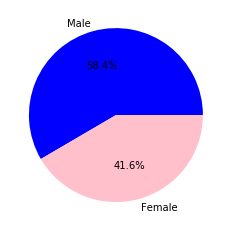

In [12]:
colors = ['Blue', 'Pink']
labels = ['Male','Female']
plt.pie(fraudDataSet.sex.value_counts(normalize=True), labels = labels, colors=colors, startangle=360, autopct='%.1f%%')
plt.show()

## 1.3

In [13]:
fraudDataSet['purchase_value'].min() #Finding Minimum Purchase Value for creating Bucket for Analysis

9

In [14]:
fraudDataSet['purchase_value'].max() #Finding Maximum Purchase value for creating Bucket for Analysis

154

In [15]:
#Creating Purchase_Value_Range Bins to analyse Purchase_Value column Independently.

Bins = [0,20, 40, 60, 80, 100, 120, 140, 160]
Labels =  ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141+']
fraudDataSet['PurchaseRange'] = pd.cut(fraudDataSet.purchase_value, Bins, labels = Labels,include_lowest = True)

fraudDataSet


,user_id,signup_date,purchase date,purchase_time,purchase_value,source,browser,sex,age,is_fraud,AgeRange,PurchaseRange
0,22058,2015-02-24 22:55:49,2015-04-18,02:47:11,34,SEO,Chrome,Male,39,0,30-39,21-40
1,333320,2015-06-07 20:39:50,2015-06-08,01:38:54,16,Ads,Chrome,Female,53,0,50-59,0-20
2,1359,2015-01-01 18:52:44,2015-01-01,18:52:45,15,SEO,Opera,Male,53,1,50-59,0-20
3,150084,2015-04-28 21:13:25,2015-05-04,13:54:50,44,SEO,Safari,Male,41,0,40-49,41-60
4,221365,2015-07-21 07:09:52,2015-09-09,18:40:53,39,Ads,Safari,Male,45,0,40-49,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29,00:30:47,43,SEO,Chrome,Male,28,1,18-29,41-60
151108,274471,2015-05-15 17:43:29,2015-05-26,12:24:39,35,SEO,Safari,Male,32,0,30-39,21-40
151109,368416,2015-03-03 23:07:31,2015-05-20,07:07:47,40,SEO,IE,Female,26,0,18-29,21-40
151110,207709,2015-07-09 20:06:07,2015-09-07,09:34:46,46,SEO,Chrome,Male,37,0,30-39,41-60


In [16]:
print('\033[01m'"Total Number of Transaction For Purchase Range :"'\033[0m')
print(fraudDataSet['PurchaseRange'].value_counts())
print("\n")
print('\033[01m'"Percentage of Transactions with respect to Purchase Range is"'\033[0m')
print(round(((fraudDataSet['PurchaseRange'].value_counts(normalize=True))*100),3))


Total Number of Transaction For Purchase Range :
21-40      60766
41-60      41043
0-20       32014
61-80      14393
81-100      2617
101-120      263
121-140       15
141+           1
Name: PurchaseRange, dtype: int64


Percentage of Transactions with respect to Purchase Range is
21-40      40.213
41-60      27.161
0-20       21.186
61-80       9.525
81-100      1.732
101-120     0.174
121-140     0.010
141+        0.001
Name: PurchaseRange, dtype: float64


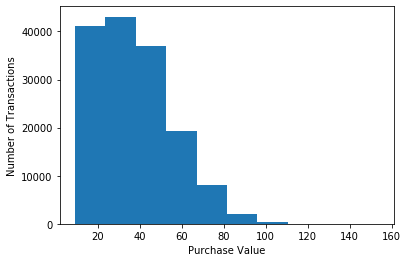

In [17]:
value = fraudDataSet['purchase_value']

plt.hist(value, bins=10,)
plt.xlabel("Purchase Value") 
plt.ylabel("Number of Transactions") 
plt.show()


## 1.4

In [18]:
print('\033[01m'"Total Number of Transaction With respect to BROWSER :"'\033[0m')
print(fraudDataSet['browser'].value_counts())
print("\n")
print('\033[01m'"Percentage of Transactions with respect to BROWSER is"'\033[0m')
print(round(((fraudDataSet['browser'].value_counts(normalize=True))*100),1))


Total Number of Transaction With respect to BROWSER :
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64


Percentage of Transactions with respect to BROWSER is
Chrome     40.7
IE         24.3
Safari     16.3
FireFox    16.3
Opera       2.4
Name: browser, dtype: float64


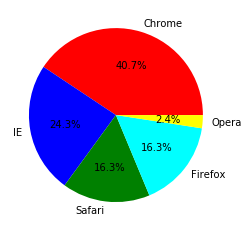

In [19]:
labels = ['Chrome','IE','Safari','Firefox','Opera']
colors = ['Red', 'Blue', 'Green' , 'Cyan' , 'Yellow']
plt.pie(fraudDataSet.browser.value_counts(normalize=True), labels = labels, colors=colors, startangle=360, autopct='%.1f%%')
plt.show()

## 1.5

In [20]:
print('\033[01m'"Total Number of Transaction With respect to SOURCE :"'\033[0m')
print(fraudDataSet['source'].value_counts())
print("\n")
print('\033[01m'"Percentage of Transactions with respect to SOURCE is"'\033[0m')
print(round(((fraudDataSet['source'].value_counts(normalize=True))*100),3))


Total Number of Transaction With respect to SOURCE :
SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64


Percentage of Transactions with respect to SOURCE is
SEO       40.113
Ads       39.627
Direct    20.260
Name: source, dtype: float64


Text(0, 0.5, 'Source')

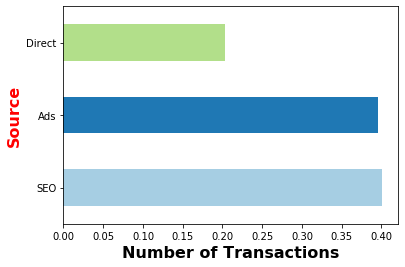

In [21]:
## Plotting the Source against the total number of  transactions

fraudDataSet['source'].value_counts(normalize=True).plot(kind='barh', color=plt.cm.Paired(np.arange(len(fraudDataSet))))
plt.xlabel('Number of Transactions', fontweight='bold', color = 'Black', fontsize='16', horizontalalignment='center')
plt.ylabel('Source', fontweight='bold', color = 'Red', fontsize='16', horizontalalignment='center')

#### 2A - Hypothesis 1: Transactions that occur within the same date as sign-up have a higher probability of being fraudulent in nature. 

In [22]:
q2Hypotheis1CopyData = fraudDataSetOrignal.copy()

In [23]:
q2Hypotheis1CopyData['signup_onlydate'] = pd.to_datetime(q2Hypotheis1CopyData['signup_date'].dt.date)

In [24]:
q2Hypotheis1CopyData['signup_Equals_PurchaseDate']=np.where(q2Hypotheis1CopyData['signup_onlydate'] == q2Hypotheis1CopyData['purchase date'],"Yes","No")

In [25]:
q2Hypotheis1CopyData['signup_Equals_PurchaseDate'].value_counts()

No     142908
Yes      8204
Name: signup_Equals_PurchaseDate, dtype: int64

In [26]:
round((q2Hypotheis1CopyData['signup_Equals_PurchaseDate'].value_counts(normalize=True))*100)

No     95.0
Yes     5.0
Name: signup_Equals_PurchaseDate, dtype: float64

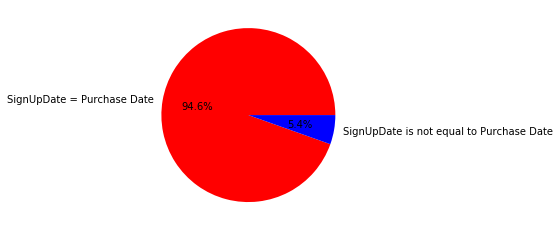

In [27]:
labels = ['SignUpDate = Purchase Date','SignUpDate is not equal to Purchase Date']
colors = ['Red', 'Blue', ]
plt.pie(q2Hypotheis1CopyData.signup_Equals_PurchaseDate.value_counts(normalize=True), labels = labels, colors=colors, startangle=360, autopct='%.1f%%')
plt.show()

In [28]:
allFraud = q2Hypotheis1CopyData.loc[q2Hypotheis1CopyData.is_fraud == 1]

In [29]:
allFraud['signup_Equals_PurchaseDate'].value_counts()

Yes    7630
No     6521
Name: signup_Equals_PurchaseDate, dtype: int64

In [30]:
round((allFraud['signup_Equals_PurchaseDate'].value_counts(normalize=True))*100)

Yes    54.0
No     46.0
Name: signup_Equals_PurchaseDate, dtype: float64

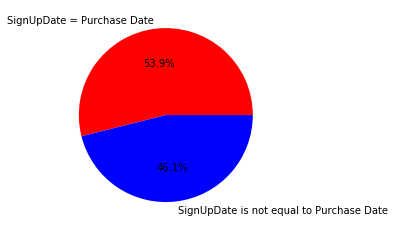

In [31]:
labels = ['SignUpDate = Purchase Date','SignUpDate is not equal to Purchase Date']
colors = ['Red', 'Blue', ]
plt.pie(allFraud.signup_Equals_PurchaseDate.value_counts(normalize=True), labels = labels, colors=colors, startangle=360, autopct='%.1f%%')
plt.show()

In [32]:
# We can see that there are 14151 records which are marked as Fraud in the dataset,
# Also 7630 Fraudalent transactions happened where the SignUp Date was same as Purchase Date
# We can clearly see that 54% fraudalent transction happened when the SignUpDate was same as Purchase Date therefore the Hypothesis " Transactions that occur within the same date as sign-up have a higher probability of being fraudulent in nature." is TRUE

#### 2B - Hypothesis 2: Transactions that occur after midnight and before 3 am have a higher likelihood of being fraudulent in nature. 

In [33]:
q2Hypotheis2CopyData = fraudDataSetOrignal.copy()

In [34]:
from datetime import time
starttime = datetime.time(0,0,0)
endtime = datetime.time(3,0,0)

In [35]:
q2Hypotheis2CopyData['PurchaseBetweenMidnightto3AM'] = np.where(((q2Hypotheis2CopyData['purchase_time'] > starttime) & (q2Hypotheis2CopyData['purchase_time'] < endtime)), "Yes", "No")

In [36]:
q2Hypotheis2CopyData['PurchaseBetweenMidnightto3AM'].value_counts()

No     132361
Yes     18751
Name: PurchaseBetweenMidnightto3AM, dtype: int64

In [37]:
round((q2Hypotheis2CopyData['PurchaseBetweenMidnightto3AM'].value_counts(normalize=True))*100)


No     88.0
Yes    12.0
Name: PurchaseBetweenMidnightto3AM, dtype: float64

In [38]:
allFraudQ2 = q2Hypotheis2CopyData.loc[q2Hypotheis2CopyData.is_fraud == 1]

In [39]:
allFraudQ2['PurchaseBetweenMidnightto3AM'].value_counts()

No     12455
Yes     1696
Name: PurchaseBetweenMidnightto3AM, dtype: int64

In [40]:
(allFraudQ2['PurchaseBetweenMidnightto3AM'].value_counts(normalize=True))*100


No     88.014981
Yes    11.985019
Name: PurchaseBetweenMidnightto3AM, dtype: float64

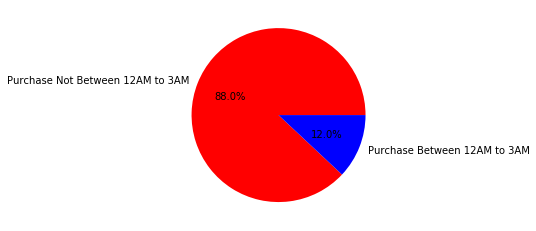

In [41]:
labels = ['Purchase Not Between 12AM to 3AM','Purchase Between 12AM to 3AM']
colors = ['Red', 'Blue' ]
plt.pie(allFraudQ2.PurchaseBetweenMidnightto3AM.value_counts(normalize=True), labels = labels, colors=colors, startangle=360, autopct='%.1f%%')
plt.show()

In [42]:
# We can see that there are 14151 records which are marked as Fraud in the dataset,
# Also only 1696 Fraudalent transactions happened between 12:00:00 AM (Midnight) and 3:00:00AM.
# We can clearly see that only 12% fraudalent transction happened between 12:00:00 AM (Midnight) and 3:00:00AM therefore the Hypothesis "Transactions that occur after midnight and before 3 am have a higher likelihood of being fraudulent in nature" is FALSE

#### 3A: Create a correlation matrix for all the numerical variables and analyse the results. Also, check for multicollinearity

In [43]:
fraudDatasetQ3 = fraudDataSetOrignal.copy()

In [44]:
fraudDatasetQ3.drop(['user_id'], axis=1, inplace = True)

In [45]:
fraudDatasetQ3.corr()

,purchase_value,age,is_fraud
purchase_value,1.000000,0.002370,0.001011
age,0.002370,1.000000,0.006624
is_fraud,0.001011,0.006624,1.000000


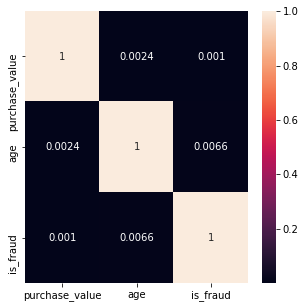

In [46]:
correlations =fraudDatasetQ3.corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

#### Checking for multcollinearity

In [47]:
numericalDataset = pd.DataFrame()
numericalDataset['age'] = fraudDatasetQ3['age']
numericalDataset['purchase_value'] = fraudDatasetQ3['purchase_value']
numericalDataset['is_fraud'] = fraudDatasetQ3['is_fraud']

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [49]:
calc_vif(numericalDataset)

,variables,VIF
0,age,4.098174
1,purchase_value,4.039354
2,is_fraud,1.098580


#### Q 3B) Do pairwise analysis of every categorical variable with the outcome variable and draw actionable insights. (5)

In [50]:
fraudDatasetQ3B= fraudDataSetOrignal.copy()

In [51]:
fraudDatasetQ3B.groupby(['sex','source','is_fraud']).size()

sex  source  is_fraud
F    Ads     0           22615
             1            2286
     Direct  0           11547
             1            1233
     SEO     0           22940
             1            2198
M    Ads     0           31753
             1            3227
     Direct  0           15843
             1            1993
     SEO     0           32263
             1            3214
dtype: int64

In [52]:
pd.pivot_table(data=fraudDatasetQ3B,
               index=['sex'],
               columns = 'source',
               values='is_fraud', 
               aggfunc='sum')

source,Ads,Direct,SEO
sex,,,
F,2286,1233,2198
M,3227,1993,3214


In [69]:
fraudDatasetQ3B.groupby(['browser','sex','is_fraud']).size()

browser  sex  is_fraud
Chrome   F    0           23131
              1            2427
         M    0           32232
              1            3642
FireFox  F    0            9205
              1            1015
         M    0           13063
              1            1327
IE       F    0           14006
              1            1269
         M    0           19534
              1            1918
Opera    F    0            1357
              1             109
         M    0            1991
              1             219
Safari   F    0            9403
              1             897
         M    0           13039
              1            1328
dtype: int64

In [70]:
pd.pivot_table(data=fraudDatasetQ3B,
               index=['browser'],
               columns = 'sex',
               values='is_fraud', 
               aggfunc='sum')

sex,F,M
browser,,
Chrome,2427,3642
FireFox,1015,1327
IE,1269,1918
Opera,109,219
Safari,897,1328


In [72]:
fraudDatasetQ3B.groupby(['browser','source','is_fraud']).size()

browser  source  is_fraud
Chrome   Ads     0           21898
                 1            2411
         Direct  0           11225
                 1            1501
         SEO     0           22240
                 1            2157
FireFox  Ads     0            8918
                 1             914
         Direct  0            4392
                 1             437
         SEO     0            8958
                 1             991
IE       Ads     0           13344
                 1            1234
         Direct  0            6695
                 1             749
         SEO     0           13501
                 1            1204
Opera    Ads     0            1313
                 1             100
         Direct  0             653
                 1              82
         SEO     0            1382
                 1             146
Safari   Ads     0            8895
                 1             854
         Direct  0            4425
                 1           

In [56]:
pd.pivot_table(data=fraudDatasetQ3B,
               index='browser',
               columns='source',
               values='is_fraud',
               aggfunc='sum')

source,Ads,Direct,SEO
browser,,,
Chrome,2411,1501,2157
FireFox,914,437,991
IE,1234,749,1204
Opera,100,82,146
Safari,854,457,914


### Q4 : Calculate the following evaluation metrics for the two confusion matrix given above: (6)

### Accuracy 
### Recall 
### Precision 

#### Defining Functions Metrics

In [57]:
def accuracy(TruePositive,TrueNegative,FalsePositive,FalseNegative):
    accuracy = ((TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalsePositive+FalseNegative))
    return accuracy

In [58]:
def recall(TruePositive,FalseNegative):
    recall = ((TruePositive)/(TruePositive+FalseNegative))
    return recall

In [59]:
def precision(TruePositive,FalsePositive):
    precision = ((TruePositive)/(TruePositive+FalsePositive))
    return precision

In [60]:
def F1(Precision,Recall):
    F1 = (2*Precision*Recall)/(Precision+Recall)
    return F1

#### KNN

In [61]:
round((accuracy(2521,44834,397,2115)),2)

0.95

In [62]:
round((recall(2521,2115)),2)

0.54

In [63]:
round((precision(2521,397)),2)

0.86

In [64]:
round((F1(0.86,0.54)),2)

0.66

#### Decision Tree

In [65]:
round((accuracy(2657,42340,2891,1979)),2)

0.9

In [66]:
round((recall(2657,1979)),2)

0.57

In [67]:
round((precision(2657,2891)),2)

0.48

In [68]:
round((F1(0.48,0.57)),2)

0.52

### Conclusion: 